In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value


In [2]:
# to compute the final model output given the all inputs and the model parameters (w and b)

def compute_model_output_for_all_x(x_train, w, b):

    f = np.zeros(x_train.shape[0])

    for i in range(x_train.shape[0]):
        f[i] = w * x_train[i] + b
    
    return f


f = compute_model_output_for_all_x(x_train, 200, 100)
print(f)

[300. 500.]


In [3]:
# now we'll try to compute the cost if we use w=200 and b=100
def compute_cost(x_train, y_train, w, b):
    cost = 0
    m = x_train.shape[0]

    f = compute_model_output_for_all_x(x_train, w, b)

    # formula to compute the cost
    for i in range(m):
        cost += 0.5 * (f[i] - y_train[i])**2

    cost /= m

    return cost

In [4]:
# test
w = 200
b = 100

cost = compute_cost(x_train, y_train, w, b)
print(cost)

0.0


<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

<a name="toc_40291_2.2"></a>
## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions. 
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.


<a name="toc_40291_2.3"></a>
### compute_gradient
<a name='ex-01'></a>
`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. The embedded comments describe the operations.

In [5]:
# need to calculate dj_dw, dj_db
# it is basically the derivative of the cost function with respect to w and b
# the gradient descent algorithm will use these gradients to update the model parameters w and b incrementally and sequentially

# to compute the gradients using all the training examples at specific values of w and b
def compute_gradients(x_train, y_train, w, b):

    m = x_train.shape[0]

    dj_dw = 0
    dj_db = 0

    f = compute_model_output_for_all_x(x_train, w, b)

    for i in range(m):
        dj_dw += (f[i] - y_train[i]) * x_train[i]
        dj_db += (f[i] - y_train[i])
    
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

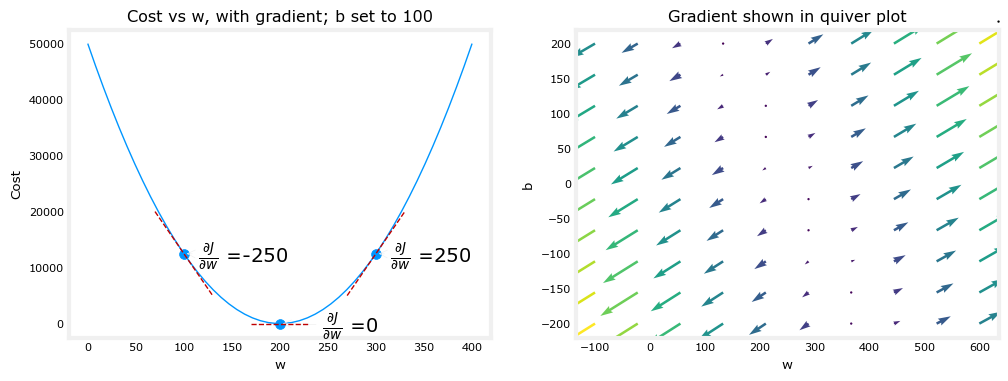

In [6]:
plt_gradients(x_train, y_train, compute_cost, compute_gradients)
plt.show()

In [7]:
# now we'll compute the gradient descent
# the gradient descent algorithm will use the gradients to update the model parameters w and b incrementally and sequentially

def gradient_descent(x_train, y_train, w_in, b_in, learning_rate, num_iterations):

    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)

    cost_history = np.zeros(num_iterations)
    param_history = np.zeros((num_iterations, 2))

    for i in range(num_iterations):

        dj_dw, dj_db = compute_gradients(x_train, y_train, w, b)

        w -= learning_rate * dj_dw
        b -= learning_rate * dj_db

        cost_history[i] = compute_cost(x_train, y_train, w, b)
        param_history[i] = np.array([w, b])

        if i% math.ceil(num_iterations/10) == 0:
            
            print(f"Iteration {i:4}: Cost {cost_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, cost_history, param_history


In [8]:
# now we'll try to run the gradient descent algorithm

w_in = 0
b_in = 0
learning_rate = 0.01
num_iterations = 10000

w, b, cost_history, param_history = gradient_descent(x_train, y_train, w_in, b_in, learning_rate, num_iterations)

print(f"w: {w: 0.3e}, b:{b: 0.5e}")

Iteration    0: Cost 0.00e+00  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 0.00e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 0.00e+00  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 0.00e+00  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 0.00e+00  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 0.00e+00  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 0.00e+00  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 0.00e+00  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 0.00e+00  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 0.00e+00  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


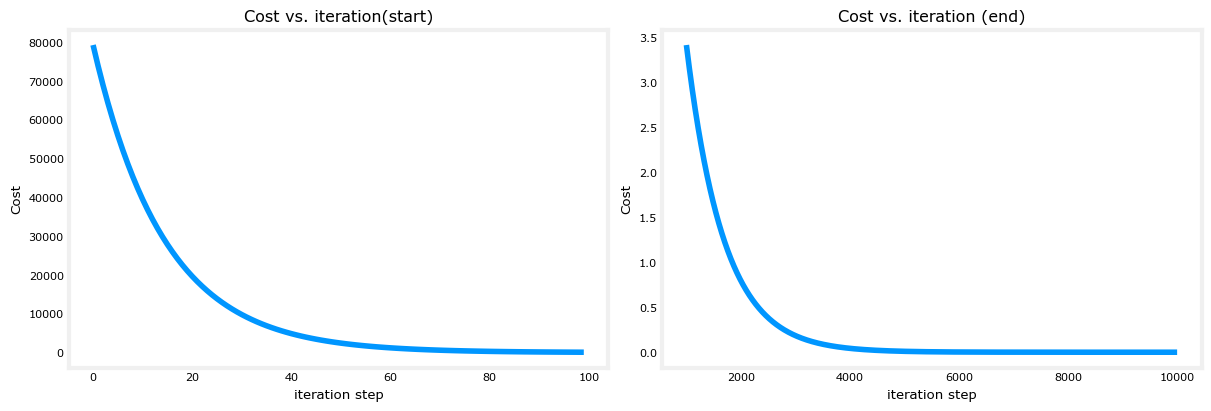

In [9]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost_history[:100])
ax2.plot(1000 + np.arange(len(cost_history[1000:])), cost_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [10]:
x_new = np.array([1.0, 1.2, 2.0, 3.0, 4.0])
y_new = compute_model_output_for_all_x(x_new, w, b)
print(y_new)

[300.00441848 340.00298863 499.99726923 699.99011998 899.98297073]


Iteration    0: Cost 0.00e+00  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 0.00e+00  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 0.00e+00  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 0.00e+00  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 0.00e+00  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 0.00e+00  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 0.00e+00  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 0.00e+00  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 0.00e+00  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04


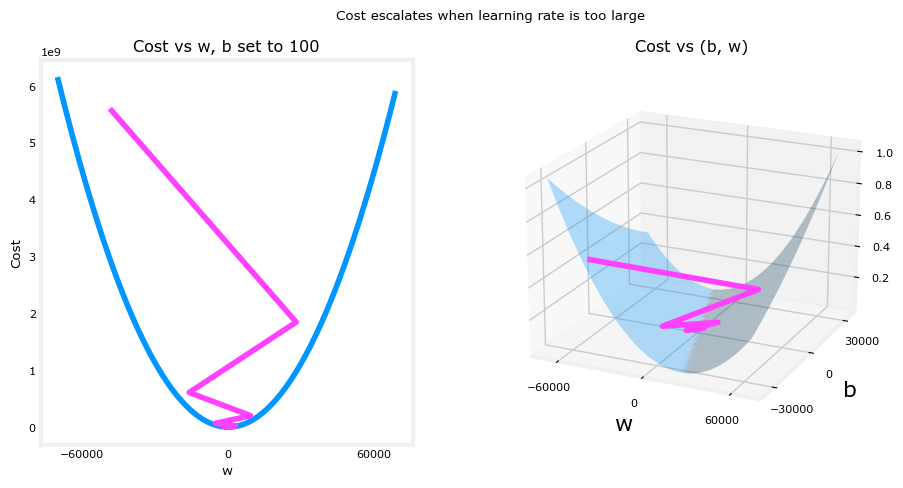

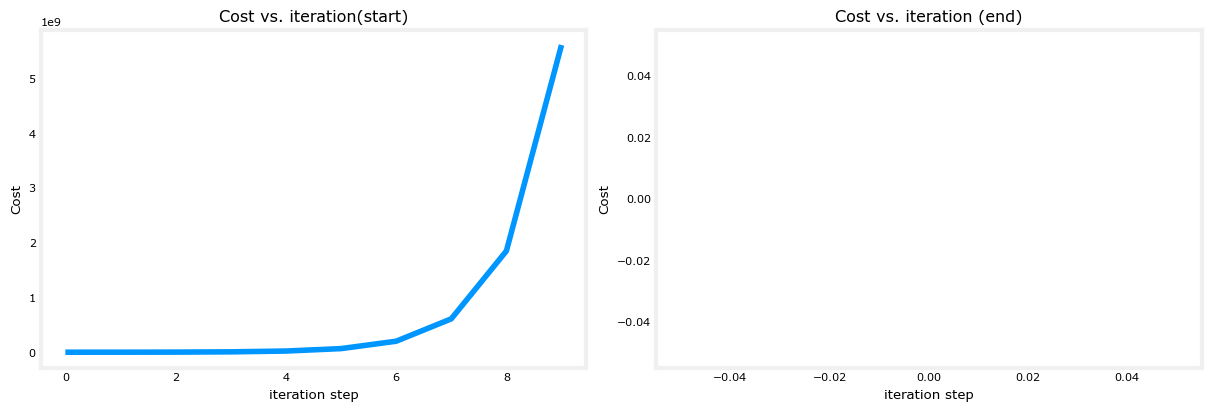

In [11]:
# now let's make predictions by changing the learning rate
learning_rate = 8.0e-1
num_iterations = 10

w_in = 0
b_in = 0

w, b, cost_history, param_history = gradient_descent(x_train, y_train, w_in, b_in, learning_rate, num_iterations)

print(f"w: {w: 0.3e}, b:{b: 0.5e}")

plt_divergence(param_history, cost_history, x_train, y_train)
plt.show()

# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost_history[:100])
ax2.plot(1000 + np.arange(len(cost_history[1000:])), cost_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()